In [1]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from column_report import get_column_report


# connect to SF Open Data API
# extract data in batches to avoid timeouts
# so we'll make our dataframes first:

#pdcalls = pd.DataFrame()
#pd_incidents = pd.DataFrame()



In [23]:
%store -r pdcalls

print('Police calls from %s to %s' % (pdcalls.report_date.min().split("T")[0], 
                                      pdcalls.report_date.max().split("T")[0]))

pdcalls.tail(5)

Police calls from 2016-03-30 to 2017-11-11


,address,address_type,agency_id,call_date,call_dttm,call_time,city,common_location,crime_id,disposition,offense_date,original_crimetype_name,report_date,state
1363925,1600 Block Of Mission St,Premise Address,1,2017-11-11T00:00:00.000,2017-11-11T23:36:00.000,2017-11-12 23:36:00,San Francisco,NaN,173154079,HAN,2017-11-11T00:00:00.000,Noise Nuisance,2017-11-11T00:00:00.000,CA
1363926,Roosevelt Wy/15th St,Intersection,1,2017-11-11T00:00:00.000,2017-11-11T23:37:00.000,2017-11-12 23:37:00,San Francisco,NaN,173154082,CIT,2017-11-11T00:00:00.000,Traffic Stop,2017-11-11T00:00:00.000,CA
1363927,1300 Block Of Polk St,Premise Address,1,2017-11-11T00:00:00.000,2017-11-11T23:34:00.000,2017-11-12 23:34:00,San Francisco,NaN,173154085,NOM,2017-11-11T00:00:00.000,Audible Alarm,2017-11-11T00:00:00.000,CA
1363928,Larkin St/geary St,Intersection,1,2017-11-11T00:00:00.000,2017-11-11T23:37:00.000,2017-11-12 23:37:00,San Francisco,NaN,173154087,Not recorded,2017-11-11T00:00:00.000,Music,2017-11-11T00:00:00.000,CA
1363929,100 Block Of Christmas Tree Point Rd,Common Location,1,2017-11-11T00:00:00.000,2017-11-11T23:48:00.000,2017-11-12 23:48:00,San Francisco,"Twin Peaks Viewpoint, Sf",173154110,HAN,2017-11-11T00:00:00.000,Passing Call,2017-11-11T00:00:00.000,CA


In [24]:
%store -r incidents

print('Police incidents from %s to %s' % (incidents.Date.min(), incidents.Date.max()))

incidents.tail(5)

Police incidents from 01/01/2003 to 12/31/2016


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2139506,170106724,ASSAULT,BATTERY,Tuesday,02/07/2017,10:08,TENDERLOIN,NONE,TURK ST / HYDE ST,-122.415695,37.782585,"(37.78258519684673, -122.41569492213362)",17010672404134
2139507,170115747,ASSAULT,BATTERY,Friday,02/10/2017,10:28,MISSION,NONE,1600 Block of BRYANT ST,-122.410478,37.766246,"(37.76624632091369, -122.41047806948747)",17011574704134
2139508,170177565,ASSAULT,BATTERY,Wednesday,03/01/2017,00:01,SOUTHERN,NONE,MISSION ST / 4TH ST,-122.404270,37.784479,"(37.784478853874475, -122.40427017948574)",17017756504134
2139509,170183506,VEHICLE THEFT,STOLEN TRUCK,Friday,03/03/2017,20:30,PARK,NONE,1400 Block of GROVE ST,-122.440483,37.775553,"(37.77555290168326, -122.44048310699829)",17018350607025
2139510,179001133,ASSAULT,CHILD ABUSE (PHYSICAL),Monday,01/30/2017,12:30,TENDERLOIN,NONE,200 Block of TURK ST,-122.413238,37.782843,"(37.7828430233213, -122.41323751667596)",17900113315015


In [ ]:
# we'll get the API in batches of 10,000 
lim = 10000

# there are slightly less than 1.5m rows
for ofst in range(len(pdcalls), int(1.4e6), 10000):
    data = pd.read_json("https://data.sfgov.org/resource/fjjd-jecq.json?$limit=%i&$offset=%i&$$app_token=dDufu38pCygTnuS8gpUXA6RmQ" \
                    % (lim, ofst))
    # make sure we're continuing the index from where we left off 
    data.index += ofst
    pdcalls = pdcalls.append(data)
    print(len(pdcalls))
    %store pdcalls
      


In [3]:
get_column_report(pdcalls)

,Column Name,Data Type,Unique Count,Sample Value,NaNs,% NaN
0,address,object,51283,1500 Block Of Pine St,0,0.00
1,address_type,object,4,Premise Address,0,0.00
2,agency_id,int64,1,1,0,0.00
3,call_date,object,592,2016-09-20T00:00:00.000,0,0.00
4,call_dttm,object,641581,2016-09-20T11:50:00.000,0,0.00
5,call_time,datetime64[ns],1440,2017-11-12T11:50:00.000000000,0,0.00
8,crime_id,int64,1363921,162641608,0,0.00
9,disposition,object,29,REP,0,0.00
10,offense_date,object,592,2016-09-20T00:00:00.000,0,0.00
11,original_crimetype_name,object,12992,Complaint Unkn,0,0.00


In [15]:
# we'll get the API in batches of 10,000 
lim = 10000

# there are slightly less than 1.5m rows
for ofst in range(0, int(2.2e6), 10000):
    data = pd.read_json("https://data.sfgov.org/resource/PdId.json?$limit=%i&$offset=%i&$$app_token=dDufu38pCygTnuS8gpUXA6RmQ" \
                    % (lim, ofst))
    # make sure we're continuing the index from where we left off 
    data.index += ofst
    incidents = pd_incidents.append(data)
    print(len(incidents))
    %store incidents
      

In [14]:
incidents.columns

Index(['address', 'category', 'date', 'dayofweek', 'descript', 'incidntnum',
       'location', 'pddistrict', 'pdid', 'resolution', 'time', 'x', 'y'],
      dtype='object')

In [19]:
get_column_report(incidents)

,Column Name,Data Type,Unique Count,Sample Value,NaNs,% NaN
0,IncidntNum,int64,1688666,150060275,0,0.0
1,Category,object,39,NON-CRIMINAL,0,0.0
2,Descript,object,915,LOST PROPERTY,0,0.0
3,DayOfWeek,object,7,Monday,0,0.0
4,Date,object,5415,01/19/2015,0,0.0
5,Time,object,1439,14:00,0,0.0
7,Resolution,object,17,NONE,0,0.0
8,Address,object,25106,18TH ST / VALENCIA ST,0,0.0
9,X,float64,59438,-122.422,0,0.0
10,Y,float64,57583,37.7617,0,0.0


In [20]:
merged = pdcalls.merge(pd_incidents, left_on='Crime Id', right_on='IncidntNum', how='right')

print(len(pd_calls))
print(len(pd_incidents))
print(len(merged))

incidents_bydistrict.loc[:, 'num_calls'] = pd.Series(merged[['IncidntNum', 'Crime Id', 'PdDistrict']][~merged['Crime Id'].isnull()] \
                                                     .groupby(['PdDistrict']).count().reset_index().IncidntNum)

incidents_bydistrict.loc[:, 'calls_by_incidents'] = 100*incidents_bydistrict.num_calls \
                                                            / incidents_bydistrict.num_incidents
    


merged[~merged['Crime Id'].isnull()].head(3)

1333995
2133978
2133978


,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address_x,City,...,DayOfWeek,Date,Time,PdDistrict,Resolution,Address_y,X,Y,Location,PdId
0,160923516.0,915 Sleeper,04/01/2016,04/01/2016,04/01/2016,21:19,04/01/2016 09:19:00 PM,GOA,1200 Block Of Pine St,San Francisco,...,Saturday,11/12/2016,22:45,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.783386237938174, -122.40985372994119)",16092351612080
1,160923516.0,915 Sleeper,04/01/2016,04/01/2016,04/01/2016,21:19,04/01/2016 09:19:00 PM,GOA,1200 Block Of Pine St,San Francisco,...,Saturday,11/12/2016,22:45,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.783386237938174, -122.40985372994119)",16092351627130
2,160930038.0,Suspicious Vehicle,04/02/2016,04/02/2016,04/02/2016,00:10,04/02/2016 12:10:00 AM,HAN,Delancey St/brannan St,San Francisco,...,Monday,11/14/2016,17:00,RICHMOND,NONE,100 Block of JORDAN AV,-122.456650,37.782663,"(37.78266336083656, -122.4566503610944)",16093003806241


In [35]:
# incidents_bydistrict = pd_incidents[['PdDistrict', 'IncidntNum']].groupby(['PdDistrict']).count().reset_index() \
#                                                                 .rename(columns={'IncidntNum':'num_incidents'})

incidents_bydistrict

,PdDistrict,num_incidents,num_calls,calls_by_incidents
0,BAYVIEW,213674,2598,1.215871
1,CENTRAL,215727,3004,1.392501
2,INGLESIDE,188050,2235,1.188514
3,MISSION,288544,3866,1.339830
4,NORTHERN,261883,3075,1.174188
5,PARK,121286,1421,1.171611
6,RICHMOND,112300,1594,1.419412
7,SOUTHERN,384746,4493,1.167783
8,TARAVAL,160820,2231,1.387265
9,TENDERLOIN,186947,1777,0.950537


<Container object of 10 artists>

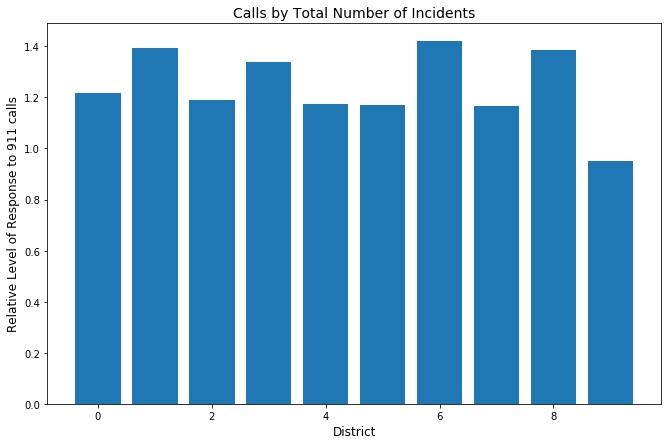

In [42]:
import matplotlib.pyplot as plt

import plotly.plotly as py

%matplotlib inline

fig=plt.figure(figsize=(11, 7), facecolor='w', edgecolor='k')



#plt.xticks(incidents_bydistrict.PdDistrict)
plt.ylabel('Relative Level of Response to 911 calls', size=12)
plt.xlabel('District', size=12)
plt.title('Calls by Total Number of Incidents', size=14)

plt.bar(range(len(incidents_bydistrict.PdDistrict)), incidents_bydistrict.calls_by_incidents)
#plt.xticks(incidents_bydistrict.PdDistrict)

# need to label the districts but I'm running low on time!
# but we can see that in the Tenderloin, for example, crime is reported very infrequently relative to the 
# number of incidents occurring there! and in richmond, on the other hand,

In [20]:
# explore how the different categories of incidents tend to be resolved:

for name, group in incidents['Resolution'].groupby(incidents['Category']):
    print('Category: %s \n' % name)
    print('Num incidents: %i \n' % group.count())
    print('Resolutions by Police Dept (by percentage): \n', round(100*group.value_counts() / group.count(), 3))
    print('\n')

Category: ARSON 

Num incidents: 3773 

Resolutions by Police Dept (by percentage): 
 NONE                                      81.368
ARREST, BOOKED                            15.266
JUVENILE BOOKED                            0.822
UNFOUNDED                                  0.663
PSYCHOPATHIC CASE                          0.451
ARREST, CITED                              0.451
JUVENILE CITED                             0.239
JUVENILE ADMONISHED                        0.239
JUVENILE DIVERTED                          0.133
COMPLAINANT REFUSES TO PROSECUTE           0.080
NOT PROSECUTED                             0.080
PROSECUTED BY OUTSIDE AGENCY               0.080
CLEARED-CONTACT JUVENILE FOR MORE INFO     0.053
EXCEPTIONAL CLEARANCE                      0.053
PROSECUTED FOR LESSER OFFENSE              0.027
Name: Resolution, dtype: float64


Category: ASSAULT 

Num incidents: 187771 

Resolutions by Police Dept (by percentage): 
 NONE                                      58.360
ARRES

In [25]:
'''
DISPOSITIONS:
ABA Abated
ADM Admonished 
ADV Advised 
ARR Arrest 
CAN Cancel 
CSA CPSA assignment 
22 Cancel 
CIT Cited 
CRM Criminal Activation 
GOA Gone on Arrival 
HAN Handled
NCR Non-Criminal 
ND No Disposition 
NOM No Merit 
PAS Premises Appears Secure 
REP Report 
UTL Unable to Locate 
VAS Vehicle Appears Secure
'''

pdcalls.disposition.unique()

array(['REP', 'UTL', 'HAN', 'CAN', 'ADV', 'GOA', 'Not recorded', 'ADM',
       'CIT', 'ND', 'NOM', 'ABA', '22', 'PAS', 'ARR', 'NCR', 'INC', 'SFD',
       'DUP', 'HOT', 'CRT', 'VAS', 'CRM', 'CHP', 'FIR', 'ENC', 'OTS',
       'TH2', 'OME'], dtype=object)